In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
beta = 10
N = 100
width = 0.95

def w(l,r,x):
    cl = (l-N)/N
    cr = (r-N)/N
    cx = (x-N)/N
    y = -(cl+cr)/2 + cx
    y = (y + 1) % 2 - 1
    if np.abs(y) <= width:
        return 1
    else:
        return 0

weights = np.array([[[ w(l,r,x) for l in range(2*N+1)]
                                for r in range(2*N+1)]
                                for x in range(2*N+1)])

def combine_densities(fl, fr):
    f = np.transpose(fl) @ weights @ fr
    return f / np.sum(f)

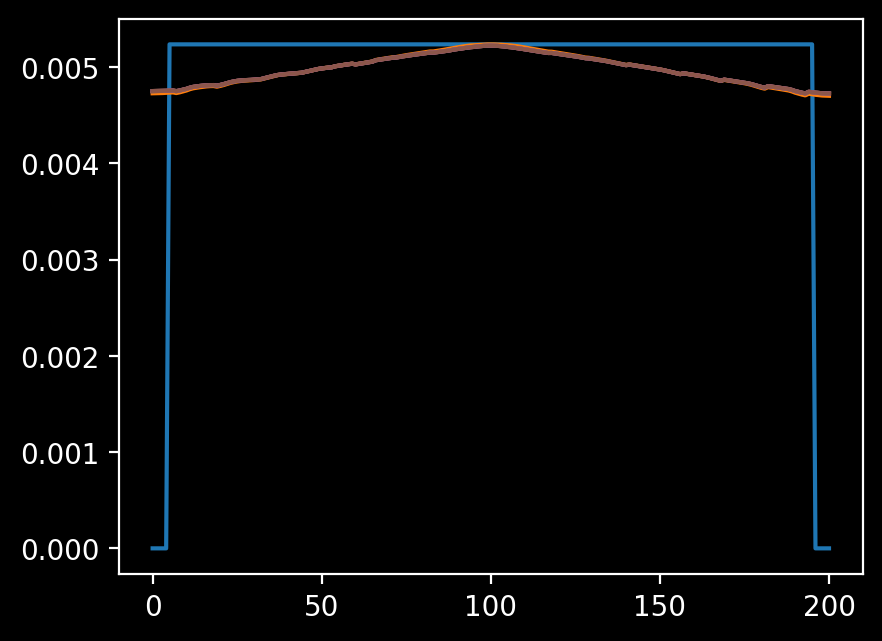

In [32]:
f = np.zeros(2*N+1)
f[N] = 1

iterations_per_snapshot = 1
snapshots = 6
iteration_counter = iterations_per_snapshot
snapshot_counter = snapshots

while snapshot_counter > 0:
    f = combine_densities(f,f)
    iteration_counter -= 1

    if iteration_counter == 0:
        plt.plot(f)
        snapshot_counter -= 1
        iteration_counter = iterations_per_snapshot

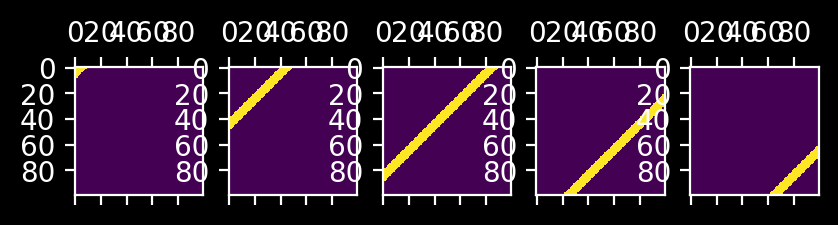

In [5]:
fig, axes = plt.subplots(1,5)
for i, ax in enumerate(axes):
    ax.matshow(weights[i * N // 5])